In [29]:
import os
import pickle
import numpy as np
import seaborn as sns
root_path = '/Users/jiahang/Documents/dagma/src/dagma/'
n_nodes = 40

In [5]:
with open(os.path.join(root_path, 'simulated_data/v11/v40/W/W_2_0.pkl'), 'rb') as f:
    W = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W['W_est']

# assumption 1: the epsilon Z0 mostly come from epsilon |W0|
* conclusion: yes!

In [23]:
eps = 5e-4
Z0 = (np.abs(W_est[:n_nodes, :n_nodes][~B_true]) - np.abs(W_est[n_nodes:, :n_nodes][~B_true]))
eps_mask = (Z0 < 0. + eps) & (Z0 > 0.)

In [24]:
np.abs(W_est[:n_nodes, :n_nodes][~B_true])[eps_mask].max()

0.0005639243021697995

# assumption 2: the epsilon |W0| have smaller |W0|/(|W0|^2 + |W0|) than non-epsilon |W0|
* this assumption holds in our observations
* mathematically, $$\frac{|W0_{\epsilon}|}{|W0_{\epsilon}|^2 + |W0_{\epsilon}|} < \frac{|W0_{!\epsilon}|}{|W0_{!\epsilon}|^2 + |W0_{!\epsilon}|} $$
* we also have $$\frac{|W0_{\epsilon}|}{|W0_{\epsilon}|^2} < \frac{|W0_{!\epsilon}|}{|W0_{!\epsilon}|^2} $$

<Axes: >

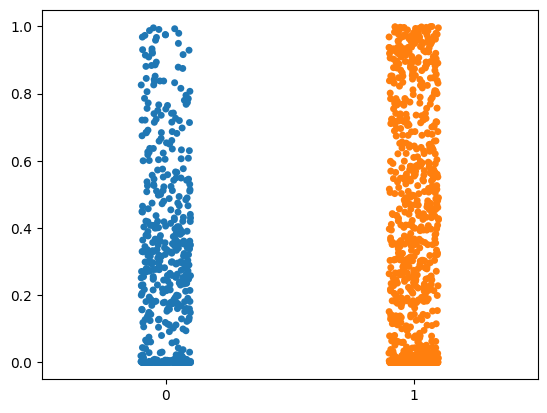

In [55]:
W_est_2 = W_est @ W_est
sns.stripplot([
    np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]) / 
        (np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask])),
    np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]) / 
        (np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][~eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]))
])

In [74]:
# |W0^2| for eps
np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][eps_mask]).mean()

0.20544598378921317

In [56]:
# |W0| / (|W0| + |W0^2|) for eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]) / \
        (np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]))).mean()

0.2912017218528827

In [58]:
# |W0| / |W0^2| for eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]) / \
        np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][eps_mask])).mean()

2.4766188595882683

In [71]:
# |W0^2| for non-eps
np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][~eps_mask]).mean()

0.26227708863220434

In [57]:
# |W0| / (|W0| + |W0^2|) for non-eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]) / \
        (np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][~eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]))).mean()

0.35487541421770136

In [60]:
# |W0| / |W0^2| for non-eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]) / \
        np.abs(W_est_2[:n_nodes, :n_nodes][~B_true][~eps_mask])).mean()

15.37745616839613

<Axes: >

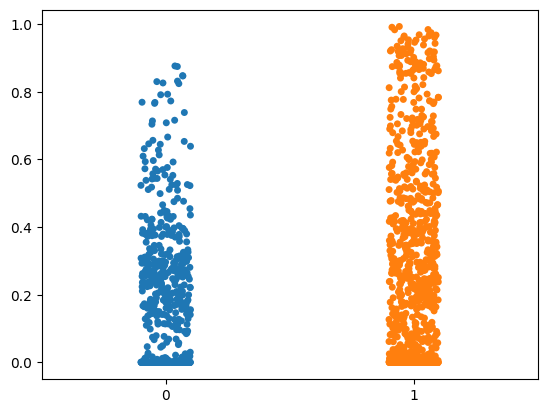

In [61]:
W_est_2_abs = np.abs(W_est) @ np.abs(W_est)
sns.stripplot([
    np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]) / 
        (np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask])),
    np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]) / 
        (np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][~eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]))
])

In [52]:
# |W0| / (|W0| + |W0|^2) for eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]) / \
        (np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]))).mean()

0.21105744188997988

In [62]:
# |W0| / |W0|^2 for eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]) / \
        np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][eps_mask])).mean()

0.4505169930171763

In [68]:
# |W0| for eps
np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask]).mean()

7.790797201707895e-05

In [64]:
# |W0|^2 for eps
np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][eps_mask]).mean()

0.2815727262461943

In [66]:
# |W0| + |W0|^2 for eps
(np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][eps_mask]) + 
 np.abs(W_est[:n_nodes, :n_nodes][~B_true][eps_mask])).mean()

0.28165063421821135

In [53]:
# |W0| / (|W0| + |W0|^2) for non-eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]) / \
        (np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][~eps_mask]) + 
         np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]))).mean()

0.275128976453846

In [63]:
# |W0| / |W0|^2 for non-eps
(np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]) / \
        np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][~eps_mask])).mean()

1.735220070404662

In [69]:
# |W0| for non-eps
np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask]).mean()

0.007726410250577844

In [65]:
# |W0|^2 for non-eps
np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][~eps_mask]).mean()

0.35061144678572725

In [67]:
# |W0| + |W0|^2 for eps
(np.abs(W_est_2_abs[:n_nodes, :n_nodes][~B_true][~eps_mask]) + 
 np.abs(W_est[:n_nodes, :n_nodes][~B_true][~eps_mask])).mean()

0.3583378570363051

# assumption 3: network deconvolution doesn't follow the assumption 2
* yes. Here are two examples to support our assumption. Given a graph $i \rightarrow k \rightarrow j$ and $i \rightarrow j$ with $ w_{ik} = a, w_{kj} = b$, and $w_{ij} = c$. Assuming all values larger than 0. According to network deconvolution with up to 2 order paths, we should observe a graph with $w'_{ik} = w_{ik}, w'_{kj} = w_{kj}$ and $w_{ij} = c + ab$, that is, $G_o = G_d + G_d^2$. Then we have $$ \frac{w'_{ij}}{w'_{kj}} = \frac{c + ab}{ab} = \frac{c}{ab} + 1 $$
* Next increase $w'_{kj} = b$ to $b + \epsilon$, then we have $$ \frac{w'_{ij}}{w'_{kj}} = \frac{c + ab + a\epsilon}{ab + a\epsilon} = \frac{c}{ab + a\epsilon} + 1 $$
* It's obvious that the proportion is reduced, rather than increased, contrary to our assumption 2. Similar derivations can be applied to the first sub-assumption of assumption 2.

# assumption 4: the epsilon |W0| have smaller |W0|/(|W0|^2 + |W0|^3 + |W0|^4 + |W0|) than non-epsilon |W0|
* this assumption holds in our observations

<Axes: >

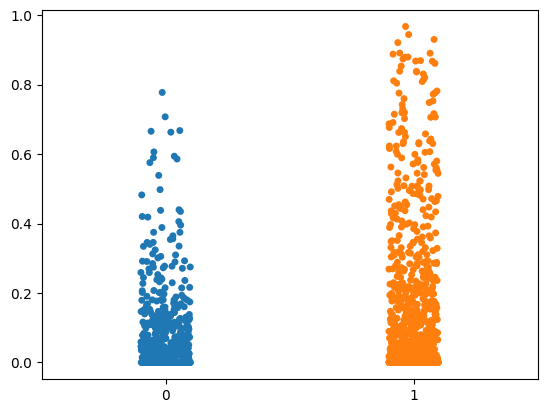

In [73]:
W_est_abs_list = [np.abs(W_est)] + [np.linalg.matrix_power(np.abs(W_est), i) for i in range(2, 5)]
_eps_numerator = W_est_abs_list[0][:n_nodes, :n_nodes][~B_true][eps_mask]
_eps_denominator = np.stack(W_est_abs_list).sum(axis=0)[:n_nodes, :n_nodes][~B_true][eps_mask]

_n_eps_numerator = W_est_abs_list[0][:n_nodes, :n_nodes][~B_true][~eps_mask]
_n_eps_denominator = np.stack(W_est_abs_list).sum(axis=0)[:n_nodes, :n_nodes][~B_true][~eps_mask]

sns.stripplot([
    _eps_numerator / _eps_denominator,
    _n_eps_numerator / _n_eps_denominator,
])

In [75]:
# |W0|/(|W0|^2 + |W0|^3 + |W0|^4 + |W0|) for eps
(_eps_numerator / _eps_denominator).mean()

0.08973544424212025

In [76]:
# |W0|/(|W0|^2 + |W0|^3 + |W0|^4 + |W0|) for non-eps
(_n_eps_numerator / _n_eps_denominator).mean()

0.15010463149773

In [77]:
# |W0|/(|W0|^2 + |W0|^3 + |W0|^4) for eps
(_eps_numerator / np.stack(W_est_abs_list[1:]).sum(axis=0)[:n_nodes, :n_nodes][~B_true][eps_mask]).mean()

0.13738796766436842

In [78]:
# |W0|/(|W0|^2 + |W0|^3 + |W0|^4) for non-eps
(_n_eps_numerator / np.stack(W_est_abs_list[1:]).sum(axis=0)[:n_nodes, :n_nodes][~B_true][~eps_mask]).mean()

0.4541638210975459